In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
import missingno as msno
from IPython.display import display
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# dataset
df = pd.read_csv("../input/divorce.csv")

In [3]:
# data exploration 
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
# statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sorry_end,170.0,1.776471,1.627257,0.0,0.0,2.0,3.0,4.0
Ignore_diff,170.0,1.652941,1.468654,0.0,0.0,2.0,3.0,4.0
begin_correct,170.0,1.764706,1.415444,0.0,0.0,2.0,3.0,4.0
Contact,170.0,1.482353,1.504327,0.0,0.0,1.0,3.0,4.0
Special_time,170.0,1.541176,1.632169,0.0,0.0,1.0,3.0,4.0
No_home_time,170.0,0.747059,0.904046,0.0,0.0,0.0,1.0,4.0
2_strangers,170.0,0.494118,0.898698,0.0,0.0,0.0,1.0,4.0
enjoy_holiday,170.0,1.452941,1.546371,0.0,0.0,1.0,3.0,4.0
enjoy_travel,170.0,1.458824,1.557976,0.0,0.0,1.0,3.0,4.0
common_goals,170.0,1.576471,1.421529,0.0,0.0,2.0,3.0,4.0


In [5]:
df.info()
df.shape
# all the columns contain integer data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

(170, 55)

<AxesSubplot:>

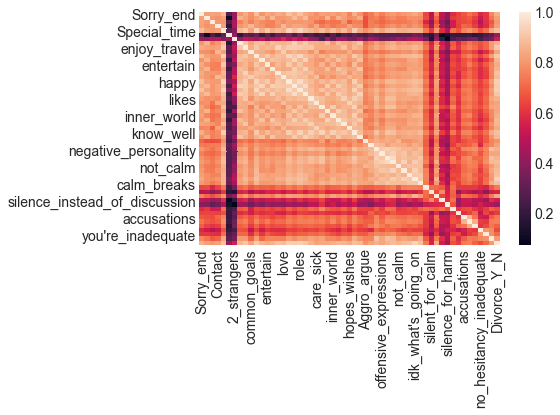

In [6]:
sns.heatmap(df.corr())
# the most positively correlated column to Divorce_Y_N is 2_strangers

Text(0.5, 1.0, 'Histogram of column 2_strangers')

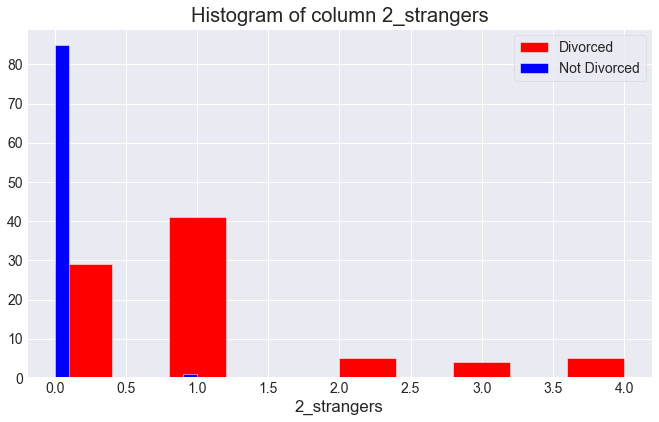

In [7]:
# visualization of the features "2_strangers" which contains the answer to the following question: 
# We are like two strangers who share the same environment at home rather than family
plt.figure(figsize=(10,6))
df[df['Divorce_Y_N']==1]['2_strangers'].hist(color='red',label='Divorced')
df[df['Divorce_Y_N']==0]['2_strangers'].hist(color='blue',label='Not Divorced')
plt.legend()
plt.xlabel('2_strangers')
plt.title('Histogram of column 2_strangers')

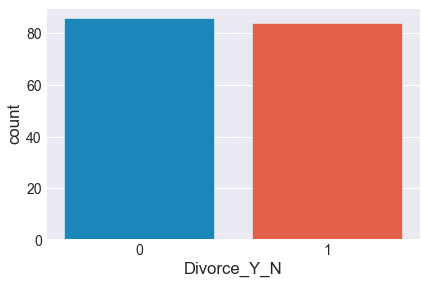

In [8]:
# the count of divorced vs still married
sns.countplot(df.Divorce_Y_N)
plt.show()

In [9]:
# preprocessing data to see if they are any missing values
df.isnull().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# the labels : select the X and y values 
X = df.drop('Divorce_Y_N',axis=1)
y = df['Divorce_Y_N']

In [12]:
# splitting data arrays into two subsets: for training data and for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [13]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn import metrics

In [14]:
# Predicting Divorce using AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [15]:
# Create the model for the website
import joblib
joblib.dump(ada, "../website/model/adaboost.pkl")

['../website/model/adaboost.pkl']

In [16]:
# predict the labels of the data values : classe for X_test
ada_pred = ada.predict(X_test)

Classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51

Accuracy: 98.0392156862745 %


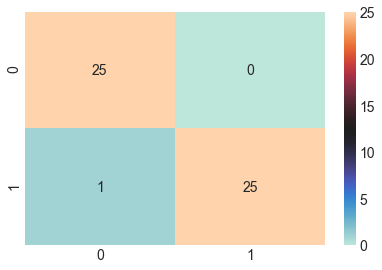

In [17]:
# first, build a text report showing the main classification metrics
print("Classification report")
print(classification_report(y_test,ada_pred))
# then, print the accuracy classification score
acc = accuracy_score(y_test, ada_pred)
print(f"Accuracy: {acc*100} %")
# finally, compute confusion matrix to evaluate the accuracy of a classification and plot the confusion matrix
cm = confusion_matrix(y_test,ada_pred)
sns.heatmap(cm, annot=True,cmap="icefire")
plt.show()

In [18]:
adaboost_score_test = ada.score(X_test, y_test)
adaboost_score_train = ada.score(X_train, y_train)

In [19]:
# Predicting Divorce using GradientBoosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [20]:
# Create the model for the website
import joblib
joblib.dump(gb, "../website/model/gradientboost.pkl")

['../website/model/gradientboost.pkl']

In [21]:
# predict the labels of the data values : classe for X_test
gb_pred = gb.predict(X_test)

Classification report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.96      0.96      0.96        26

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51

Accuracy: 96.07843137254902 %


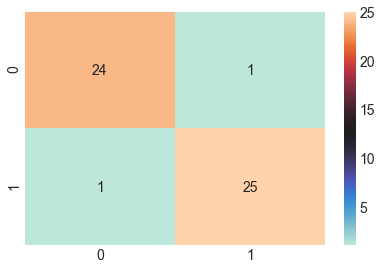

In [22]:
# first, build a text report showing the main classification metrics
print("Classification report")
print(classification_report(y_test,gb_pred))
# then, print the accuracy classification score
acc = accuracy_score(y_test, gb_pred)
print(f"Accuracy: {acc*100} %")
# finally, plot the confusion matrix
cm2 = confusion_matrix(y_test,gb_pred)
sns.heatmap(cm2, annot=True,cmap="icefire")
plt.show()

In [23]:
gb_score_test = gb.score(X_test, y_test)
gb_score_train = gb.score(X_train, y_train)

In [24]:
scores = [['AdaBoost',adaboost_score_train,adaboost_score_test],
          ['GradientBoosting Classifier',gb_score_train,gb_score_test],
         ]

score_df = pd.DataFrame(scores, columns = ['Model Name', 'TrainScore' , 'TestScore']) 
score_df.sort_values(by=["TestScore"], ascending = False)

# in conclusion, the gradient boosting classifier did worse than the adaboost classifier
# AdaBoost models results in a higher accuracy of 98%

,Model Name,TrainScore,TestScore
0,AdaBoost,1.0,0.980392
1,GradientBoosting Classifier,1.0,0.960784
